# EE P 590: Deep learning for Embedded Real-time Intelligence 

## Assignment 2: Deep learning operators & constructs (Due: 05/04 by 11:59 pm)

In [1]:
import torch 
from eep590_utils import * 

# 0. Warm-up (25 points) 

###  Answer the following in your own words (read and understand the concepts, do not copy answers from the internet): 
**(a.) Why do deep neural networks typically outperform shallow networks?**

**(b.) What are the issues involved in training very deep neural networks from an optimization perspective?** 

**(c.) What are the issues involved in training very deep neural networks from computation and memory perspective?** 

**(d.) What is a validation dataset used for?**
 
**(e.) The following learning rate plots show the loss of an algorithm versus time. Label each plot
with one of these labels: (i) Low learning rate (ii) Optimal learning rate (iii) High learning rate (iv) Very high learning rate**

![model_training2](_model2.png)

**(f.) What is the following activation function, and why is it used? How is it different from ReLU.**

![activation](activation.png)

**(g.) For a minibatch with mean M and variance V, what does batch normalization do?**

**(h.) In one or more sentences, and using sketches as appropriate, contrast: AlexNet, VGG-Net,
GoogleNet and ResNet. What was one defining characteristic of each?**

**(i.) Define the following terms: (i) Hard attention (ii) Soft attention. Which attention models can be trained with backpropagation only? What other training
method is required? Briefly explain why.**

**(j.) List 4 transformations that can be applied to images in a dataset to augment the dataset for
CNN training.**

# 1. Cross correlation (15 points) 

Implement the 2D cross-correlation process in the cross_corr_2d function, which accepts an input tensor X and a kernel tensor K and returns an output tensor Y. Refer to lecture slides for the details. 

In [2]:
def cross_corr_2d(X, K):
  """
  Computes the 2D cross-correlation operation
  
  Inputs:
  - X: Input data 
  - K: The kernel tensor
    
  Returns:
  - Y: The output tensor after performing cross-correlation
  """

  # TODO: Implement the 2D cross-correlation here        #
  pass
  #                             END OF YOUR CODE                              #
  Y = None
  return Y

In [3]:
# Example
X = torch.tensor([[0.0, 5.0, 8.0], [2.0, -1.0, 4.0], [4.0, 3.0, 7.0]])
K = torch.tensor([[5.0, -1.0], [3.0, 1.0]])

cross_corr_2d(X, K) 

# 2. Spatial batch-norm (25 points)

One way to make deep networks easier to train is to use more sophisticated optimization procedures such as SGD+momentum, RMSProp, or Adam. Another strategy is to change the architecture of the network to make it easier to train. One idea along these lines is batch normalization which was proposed by [1].

The idea is relatively straightforward. Machine learning methods tend to work better when their input data consists of uncorrelated features with zero mean and unit variance. When training a neural network, we can preprocess the data before feeding it to the network to explicitly decorrelate its features; this will ensure that the first layer of the network sees data that follows a nice distribution. However even if we preprocess the input data, the activations at deeper layers of the network will likely no longer be decorrelated and will no longer have zero mean or unit variance since they are output from earlier layers in the network. Even worse, during the training process the distribution of features at each layer of the network will shift as the weights of each layer are updated.

The authors of [1] hypothesize that the shifting distribution of features inside deep neural networks may make training deep networks more difficult. To overcome this problem, [1] proposes to insert batch normalization layers into the network. At training time, a batch normalization layer uses a minibatch of data to estimate the mean and standard deviation of each feature. These estimated means and standard deviations are then used to center and normalize the features of the minibatch. A running average of these means and standard deviations is kept during training, and at test time these running averages are used to center and normalize features.

It is possible that this normalization strategy could reduce the representational power of the network, since it may sometimes be optimal for certain layers to have features that are not zero-mean or unit variance. To this end, the batch normalization layer includes learnable shift and scale parameters for each feature dimension.


Knowing that batch normalization is a very useful technique for training deep fully-connected networks. Batch normalization can also be used for convolutional networks, but we need to tweak it a bit; the modification will be called "spatial batch normalization."

**Normally batch-normalization accepts inputs of shape `(N, D)` and produces outputs of shape `(N, D)`, where we normalize across the minibatch dimension `N`. For data coming from convolutional layers, batch normalization needs to accept inputs of shape `(N, C, H, W)` and produce outputs of shape `(N, C, H, W)` where the `N` dimension gives the minibatch size and the `(H, W)` dimensions give the spatial size of the feature map.**

**If the feature map was produced using convolutions, then we expect the statistics of each feature channel to be relatively consistent both between different imagesand different locations within the same image. Therefore spatial batch normalization computes a mean and variance for each of the `C` feature channels by computing statistics over both the minibatch dimension `N` and the spatial dimensions `H` and `W`.**

[1] [Sergey Ioffe and Christian Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", ICML 2015](https://arxiv.org/abs/1502.03167)

In [4]:
def spatial_batchnorm_forward(x, gamma, beta, bn_param):
  """
  Computes the forward pass for spatial batch normalization.
  
  Inputs:
  - x: Input data of shape (N, C, H, W)
  - gamma: Scale parameter, of shape (C,)
  - beta: Shift parameter, of shape (C,)
  - bn_param: Dictionary with the following keys:
    - mode: 'train' or 'test'; required
    - eps: Constant for numeric stability
    - momentum: Constant for running mean / variance. momentum=0 means that
      old information is discarded completely at every time step, while
      momentum=1 means that new information is never incorporated. The
      default of momentum=0.9 should work well in most situations.
    - running_mean: Array of shape (D,) giving running mean of features
    - running_var Array of shape (D,) giving running variance of features
    
  Returns a tuple of:
  - out: Output data, of shape (N, C, H, W)
  - cache: Values needed for the backward pass
  """
  out, cache = None, None

  # TODO: Implement the forward pass for spatial batch normalization.         #
  #                                                                           #
  # HINT: You can implement spatial batch normalization using the vanilla     #
  # version of batch normalization.                             #
  pass

  return out, cache


def spatial_batchnorm_backward(dout, cache):
  """
  Computes the backward pass for spatial batch normalization.
  
  Inputs:
  - dout: Upstream derivatives, of shape (N, C, H, W)
  - cache: Values from the forward pass
  
  Returns a tuple of:
  - dx: Gradient with respect to inputs, of shape (N, C, H, W)
  - dgamma: Gradient with respect to scale parameter, of shape (C,)
  - dbeta: Gradient with respect to shift parameter, of shape (C,)
  """
  dx, dgamma, dbeta = None, None, None

  # TODO: Implement the backward pass for spatial batch normalization.        #
  #                                                                           #                            #
  pass

  return dx, dgamma, dbeta

## (a.) Forward 
Implement the forward pass for spatial batch normalization in the function `spatial_batchnorm_forward`. Check your implementation by running the following:

In [ ]:
# Check the training-time forward pass by checking means and variances
# of features both before and after spatial batch normalization

N, C, H, W = 2, 3, 4, 5
x = 4 * np.random.randn(N, C, H, W) + 10

print('Before spatial batch normalization:')
print('  Shape: ', x.shape)
print('  Means: ', x.mean(axis=(0, 2, 3)))
print('  Stds: ', x.std(axis=(0, 2, 3)))

# Means should be close to zero and stds close to one
gamma, beta = np.ones(C), np.zeros(C)
bn_param = {'mode': 'train'}
out, _ = spatial_batchnorm_forward(x, gamma, beta, bn_param)

print('After spatial batch normalization:')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(axis=(0, 2, 3)))
print('  Stds: ', out.std(axis=(0, 2, 3)))

# Means should be close to beta and stds close to gamma
gamma, beta = np.asarray([3, 4, 5]), np.asarray([6, 7, 8])
out, _ = spatial_batchnorm_forward(x, gamma, beta, bn_param)
print('After spatial batch normalization (nontrivial gamma, beta):')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(axis=(0, 2, 3)))
print('  Stds: ', out.std(axis=(0, 2, 3)))

In [ ]:
# Check the test-time forward pass by running the training-time
# forward pass many times to warm up the running averages, and then
# checking the means and variances of activations after a test-time
# forward pass.

N, C, H, W = 10, 4, 11, 12

bn_param = {'mode': 'train'}
gamma = np.ones(C)
beta = np.zeros(C)
for t in xrange(50):
  x = 2.3 * np.random.randn(N, C, H, W) + 13
  spatial_batchnorm_forward(x, gamma, beta, bn_param)
bn_param['mode'] = 'test'
x = 2.3 * np.random.randn(N, C, H, W) + 13
a_norm, _ = spatial_batchnorm_forward(x, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print('After spatial batch normalization (test-time):')
print('  means: ', a_norm.mean(axis=(0, 2, 3)))
print('  stds: ', a_norm.std(axis=(0, 2, 3)))

## (b.) Backward 
Implement the backward pass for spatial batch normalization in the function `spatial_batchnorm_backward`. Run the following to check your implementation using a numeric gradient check:

In [ ]:
N, C, H, W = 2, 3, 4, 5
x = 5 * np.random.randn(N, C, H, W) + 12
gamma = np.random.randn(C)
beta = np.random.randn(C)
dout = np.random.randn(N, C, H, W)

bn_param = {'mode': 'train'}
fx = lambda x: spatial_batchnorm_forward(x, gamma, beta, bn_param)[0]
fg = lambda a: spatial_batchnorm_forward(x, gamma, beta, bn_param)[0]
fb = lambda b: spatial_batchnorm_forward(x, gamma, beta, bn_param)[0]

dx_num = eval_numerical_gradient_array(fx, x, dout)
da_num = eval_numerical_gradient_array(fg, gamma, dout)
db_num = eval_numerical_gradient_array(fb, beta, dout)

_, cache = spatial_batchnorm_forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = spatial_batchnorm_backward(dout, cache)
print 'dx error: ', rel_error(dx_num, dx)
print 'dgamma error: ', rel_error(da_num, dgamma)
print 'dbeta error: ', rel_error(db_num, dbeta)

# 3. Image gradients (40 points)

In this section we'll introduce the ImageNet dataset and a deep CNN that has been pretrained on this dataset. You will use this pretrained model to compute gradients with respect to images, and use these image gradients to produce class saliency maps and adversarial images. 

When training a model, we define a loss function which measures our current unhappiness with the model's performance; we then use backpropagation to compute the gradient of the loss with respect to the model parameters, and perform gradient descent on the model parameters to minimize the loss.

Here we will do something slightly different. We will start from a convolutional neural network model which has been pretrained to perform image classification on the ImageNet dataset. We will use this model to define a loss function which quantifies our current unhappiness with our image, then use backpropagation to compute the gradient of this loss with respect to the pixels of the image. We will then keep the model fixed, and perform gradient descent on the image to synthesize a new image. 

In [6]:
from torch.autograd import Variable
import torchvision
import torchvision.transforms as T
import random

from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
_STD = np.array([0.229, 0.224, 0.225], dtype=np.float32)

### Helper functions

Our pretrained model was trained on images that had been preprocessed by subtracting the per-color mean and dividing by the per-color standard deviation. We define a few helper functions for performing and undoing this preprocessing. You don't need to do anything in this cell.


In [7]:
def preprocess(img, size=224):
    transform = T.Compose([
        T.Scale(size),
        T.ToTensor(),
        T.Normalize(mean=_MEAN.tolist(),
                    std=_STD.tolist()),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)

def deprocess(img, should_rescale=True):
    transform = T.Compose([
        T.Lambda(lambda x: x[0]),
        T.Normalize(mean=[0, 0, 0], std=(1.0 / _STD).tolist()),
        T.Normalize(mean=(-_MEAN).tolist(), std=[1, 1, 1]),
        T.Lambda(rescale) if should_rescale else T.Lambda(lambda x: x),
        T.ToPILImage(),
    ])
    return transform(img)

def rescale(x):
    low, high = x.min(), x.max()
    x_rescaled = (x - low) / (high - low)
    return x_rescaled
    
def blur_image(X, sigma=1):
    X_np = X.cpu().clone().numpy()
    X_np = gaussian_filter1d(X_np, sigma, axis=2)
    X_np = gaussian_filter1d(X_np, sigma, axis=3)
    X.copy_(torch.Tensor(X_np).type_as(X))
    return X

### Pretrained Model
For all of our image generation experiments, we will start with a convolutional neural network which was pretrained to perform image classification on ImageNet. We can use any model here, but for the purposes of this assignment we will use SqueezeNet [2], which achieves accuracies comparable to AlexNet but with a significantly reduced parameter count and computational complexity.

Using SqueezeNet rather than AlexNet or VGG or ResNet means that we can easily perform all image generation experiments on CPU.

[2] [Iandola et al, "SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and < 0.5MB model size", arXiv 2016](https://arxiv.org/abs/1602.07360)

In [8]:
# Download and load the pretrained SqueezeNet model.
model = torchvision.models.squeezenet1_1(pretrained=True)

# We don't want to train the model, so tell PyTorch not to compute gradients
# with respect to model parameters.
for param in model.parameters():
    param.requires_grad = False

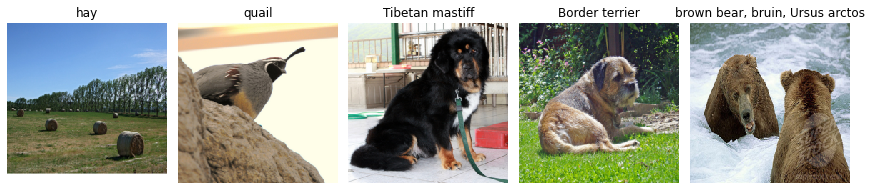

In [9]:
def load_imagenet_val(num=None):
    """Load a handful of validation images from ImageNet.
    Inputs:
    - num: Number of images to load (max of 25)
    Returns:
    - X: numpy array with shape [num, 224, 224, 3]
    - y: numpy array of integer image labels, shape [num]
    - class_names: dict mapping integer label to class name
    """
    imagenet_fn = 'data/imagenet_val_25.npz'
    if not os.path.isfile(imagenet_fn):
      print('file %s not found' % imagenet_fn)
    f = np.load(imagenet_fn, allow_pickle = True)
    X = f['X']
    y = f['y']
    class_names = f['label_map'].item()
    if num is not None:
        X = X[:num]
        y = y[:num]
    return X, y, class_names

X, y, class_names = load_imagenet_val(num=5)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i])
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.gcf().tight_layout()

## (a.) Saliency Maps

Using the pretrained model, we will compute class saliency maps as described in Section 3.1 of [3].

A saliency map tells us the degree to which each pixel in the image affects the classification score for that image. To compute it, we compute the gradient of the unnormalized score corresponding to the correct class (which is a scalar) with respect to the pixels of the image. If the image has shape `(3, H, W)` then this gradient will also have shape `(3, H, W)`; for each pixel in the image, this gradient tells us the amount by which the classification score will change if the pixel changes by a small amount. To compute the saliency map, we take the absolute value of this gradient, then take the maximum value over the 3 input channels; the final saliency map thus has shape `(H, W)` and all entries are nonnegative.

[3] [Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014.](https://arxiv.org/abs/1312.6034)

In [10]:
def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; LongTensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()
    
    # Wrap the input tensors in Variables
    X_var = Variable(X, requires_grad=True)
    y_var = Variable(y)
    saliency = None
    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image. You first want to compute the loss over the correct   #
    # scores, and then compute the gradients with a backward pass.               #
    ##############################################################################
    
    return saliency

In [ ]:
def show_saliency_maps(X, y):
    # Convert X and y from numpy arrays to Torch Tensors
    X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
    y_tensor = torch.LongTensor(y)

    # Compute saliency maps for images in X
    saliency = compute_saliency_maps(X_tensor, y_tensor, model)

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    saliency = saliency.numpy()
    N = X.shape[0]
    for i in range(N):
        plt.subplot(2, N, i + 1)
        plt.imshow(X[i])
        plt.axis('off')
        plt.title(class_names[y[i]])
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(12, 5)
    plt.show()

show_saliency_maps(X, y)

### Hint: Use gather() in pytorch 



In [ ]:
# Example of using gather to select one entry from each row in PyTorch
def gather_example():
    N, C = 4, 5
    s = torch.randn(N, C)
    y = torch.LongTensor([1, 2, 1, 3])
    print(s)
    print(y)
    print(s.gather(1, y.view(-1, 1)).squeeze())
gather_example()

### Sample expected output: 

![saliency maps](sal_maps.png)

## (b.) Adversarial Images 
We can also use image gradients to generate "adversarial images" as discussed in [4]. Given an image and a target class, we can perform gradient ascent over the image to maximize the target class, stopping when the network classifies the image as the target class. Implement the following function to generate adversarial images.

[4] [Szegedy et al, "Intriguing properties of neural networks", ICLR 2014](https://arxiv.org/abs/1312.6199)

In [ ]:
def make_adv_image(X, target_y, model):
    """
    Generate an adversarial image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image; Tensor of shape (1, 3, 224, 224)
    - target_y: An integer in the range [0, 1000)
    - model: A pretrained CNN

    Returns:
    - X_adv: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    # Initialize our adversarial image to the input image, and wrap it in a Variable.
    X_adv = X.clone()
    X_adv_var = Variable(X_adv, requires_grad=True)
    
    learning_rate = 1
    ##############################################################################
    # TODO: Generate a adversarial image X_adv that the model will classify as #
    # the class target_y. You should perform gradient ascent on the score of the #
    # target class, stopping when the model is fooled.                           #
    # Hint: When computing an update step, first normalize the gradient:         #
    #   dX = learning_rate * g / ||g||_2                                         #
    #                                                                            #
    # You should write a training loop.                                          #
    #                                                                            #
    # HINT: For most examples, you should be able to generate a adv image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    # You can print your progress over iterations to check your algorithm.       #
    ##############################################################################
    

    return X_adv

In [ ]:
idx = 0
target_y = 6

X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
X_adv = make_adv_image(X_tensor[idx:idx+1], target_y, model)

scores = model(Variable(X_adv))
assert target_y == scores.data.max(1)[1][0], 'The model is not fooled!'

After generating a fooling image, run the following cell to visualize the original image, the fooling image, as well as the difference between them.

In [ ]:
X_fooling_np = deprocess(X_adv.clone())
X_fooling_np = np.asarray(X_fooling_np).astype(np.uint8)

plt.subplot(1, 4, 1)
plt.imshow(X[idx])
plt.title(class_names[y[idx]])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(X_fooling_np)
plt.title(class_names[target_y])
plt.axis('off')

plt.subplot(1, 4, 3)
X_pre = preprocess(Image.fromarray(X[idx]))
diff = np.asarray(deprocess(X_fooling - X_pre, should_rescale=False))
plt.imshow(diff)
plt.title('Difference')
plt.axis('off')

plt.subplot(1, 4, 4)
diff = np.asarray(deprocess(10 * (X_fooling - X_pre), should_rescale=False))
plt.imshow(diff)
plt.title('Magnified difference (10x)')
plt.axis('off')

plt.gcf().set_size_inches(12, 5)
plt.show()

### Sample expected output: 

![Adversarial Images](adv_img.png)

# 4. RNN: Text-to-tag classification (40 points)


## Task

Given a sentence, give a tag to each word. 

```
Richard  lives  in  Seattle
B-PER     O     O   B-LOC 
```

(Note: Here B-PER means person, and B-LOC means location)

**We have provided the dataset and the partial codes, your task is to complete all the required modules such that it works end-to-end. You need to complete the following steps:** 

1. **Process the dataset** Run the following script

```
python3 process_dataset.py
```

It should extract the sentences and labels from the dataset, split it into train/val/test and save it in a convenient format for our model. (for reference, see `data/example/`)

_Debug_ If you get some errors, check that you downloaded all the right files and it is saved in the right directories/paths. If you have issues with encoding, try running the script with python 2.7.


2. **Build** vocabularies and parameters for your dataset by running

```
python3 build_vocab.py --data_dir data/new_data
```

It should write vocabulary files `words.txt` and `tags.txt` containing the words and tags in the dataset. It should also save a `dataset_params.json` with some extra information.

3. **Your first experiment** We created a `base_model` directory for you under the `experiments` directory. It contains a file `params.json` which sets the hyperparameters for the experiment. It looks like

```json
{
  "learning_rate": 1e-3,
  "batch_size": 5,
  "num_epochs": 2
}
```

For every new experiment, you will need to create a new directory under `experiments` with a `params.json` file.

3. **Train** your experiment. Simply run

```
python3 train.py --data_dir data/new_data --model_dir experiments/base_model
```

It should instantiate a model and train it on the training set following the hyperparameters specified in `params.json`. It should also evaluate some metrics on the development set.

4. **Your first hyperparameters search** We created a new directory `learning_rate` in `experiments` for you. Now, run

```
python3 search_hyperparams.py --data_dir data/new_data --parent_dir experiments/learning_rate
```

It should train and evaluate a model with different values of learning rate defined in `search_hyperparams.py` and create a new directory for each experiment under `experiments/learning_rate/`.

5. **Display the results** of the hyperparameters search in a nice format

```
python3 display_results.py --parent_dir experiments/learning_rate
```

6. **Evaluation on the test set** Once you've run many experiments and selected your best model and hyperparameters based on the performance on the development set, you can finally evaluate the performance of your model on the test set. Run

```
python3 evaluate.py --data_dir data/new_data --model_dir experiments/base_model
```

Once you get something working for the dataset, feel free to edit any part of the code to suit your own needs.



# 5. References & Misc. (15 points) 

**(a.) How many hours (approx) did you spend on this assignment totally? Document and explain your journey, including the issues/challenges you faced (both technical and non-technical).**

**(b.) Cite all the resources and references you consulted to complete this assignment.** 